In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits

In [3]:
# Importing the fits file of the matched catalogue that was obtained from the paper

data_paper = fits.open('Data/matched_catalogue.fits')
df_paper = pd.DataFrame(data_paper[1].data)
df_paper = df_paper[df_paper['gal_name'] == 'NGC1566']
df_paper.columns

Index(['gal_name', 'region_ID', 'assoc_ID', 'ra_neb', 'dec_neb', 'ra_asc',
       'dec_asc', 'overlap_neb', 'overlap_asc', 'overlap', 'environment',
       'neighbors', 'HA6562_lum', 'HA6562_lum_err', 'EBV_balmer',
       'EBV_balmer_err', 'EBV_stellar', 'EBV_stellar_err', 'age', 'age_err',
       'mass', 'mass_err', 'NUV_flux', 'NUV_flux_err', 'U_flux', 'U_flux_err',
       'B_flux', 'B_flux_err', 'V_flux', 'V_flux_err', 'I_flux', 'I_flux_err',
       'HA/FUV', 'HA/FUV_err', 'EW_HA', 'EW_HA_err', 'EW_HA_corr',
       'EW_HA_corr_err', 'logq', 'logq_err', 'Delta_met_scal', 'density',
       'density_err', 'GMC_sep'],
      dtype='object')

In [4]:
# Loading the cross matched catalogue of the MUSE and UVIT data which contains the estimated ages of HII regions in the galaxy NGC 1566

df_cross = pd.read_csv('Data/Cross Matched MUSE and UVIT with Ages', delimiter = ',')
df_cross.columns

Index(['recno', 'Galaxy', 'region_ID', 'RAJ2000', 'DEJ2000', 'deprojDist',
       'FHa6562', 'e_FHa6562', 'FHb4861', 'e_FHb4861',
       ...
       'F_count', 'N_count', 'magF', 'errF', 'magN', 'errN', 'F_N', 'errcol',
       'clump_age', 'Separation'],
      dtype='object', length=107)

In [5]:
# Merging both catalogues based on their common region ID
data_com = pd.merge(df_paper, df_cross, on='region_ID') 
data_com

,gal_name_x,region_ID,assoc_ID,ra_neb,dec_neb,ra_asc,dec_asc,overlap_neb,overlap_asc,overlap,...,F_count,N_count,magF,errF,magN,errN,F_N,errcol,clump_age,Separation
0,NGC1566,11.0,369.0,65.036724,-54.945444,65.036731,-54.945465,0.294286,0.990385,partial,...,48.521663,61.919473,21.112406,0.156226,21.259536,0.138374,-0.147131,0.208696,14.585377,1.061469
1,NGC1566,16.0,1648.0,65.000070,-54.908804,65.000077,-54.908844,0.263448,1.000000,contained,...,59.407251,87.711032,20.945642,0.141254,20.958951,0.116389,-0.013308,0.183028,23.882364,0.229917
2,NGC1566,20.0,87.0,64.995294,-54.954627,64.995341,-54.954638,0.277333,0.951945,partial,...,220.092905,417.506489,19.462684,0.073883,19.152777,0.054082,0.309907,0.091561,99.639006,0.204856
3,NGC1566,21.0,59.0,65.008437,-54.958595,65.008451,-54.958600,0.126667,1.000000,contained,...,29.985589,45.612906,21.635032,0.198575,21.579312,0.161111,0.055720,0.255712,38.342310,0.500465
4,NGC1566,24.0,639.0,65.036648,-54.941107,65.036708,-54.941096,0.203390,1.000000,contained,...,35.753850,48.262497,21.476767,0.181897,21.585512,0.156643,-0.108744,0.240049,15.336872,1.485126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,NGC1566,2323.0,1006.0,64.982092,-54.934686,64.981801,-54.934595,0.030252,0.058824,partial,...,64.223793,90.056891,20.786945,0.135882,20.809990,0.114874,-0.023045,0.177932,20.713455,0.583306
124,NGC1566,2326.0,1465.0,64.987090,-54.922723,64.986862,-54.922754,0.130000,0.409910,partial,...,66.034900,88.391690,20.754879,0.134016,20.828403,0.115943,-0.073524,0.177209,16.001794,0.952214
125,NGC1566,2332.0,334.0,64.996913,-54.946115,64.997412,-54.945988,0.007913,0.022535,partial,...,621.867192,945.361685,18.309510,0.044683,18.235512,0.036709,0.073998,0.057828,41.557309,1.033430
126,NGC1566,2352.0,1019.0,65.018663,-54.934294,65.018983,-54.934277,0.303636,0.489736,partial,...,76.299915,130.153775,20.601722,0.124729,20.407183,0.095716,0.194539,0.157223,67.335041,0.494237


In [6]:
# Checking what is the maximum difference between the two RA and DEC values
print(max(abs(data_com['ra_neb'] - data_com['RAJ2000'])))
print(max(abs(data_com['dec_neb'] - data_com['DEJ2000'])))

4.963089281773136e-07
4.995159912368763e-07


In [7]:
age_paper = np.array(data_com.age)
age_cross = np.array(data_com.clump_age)

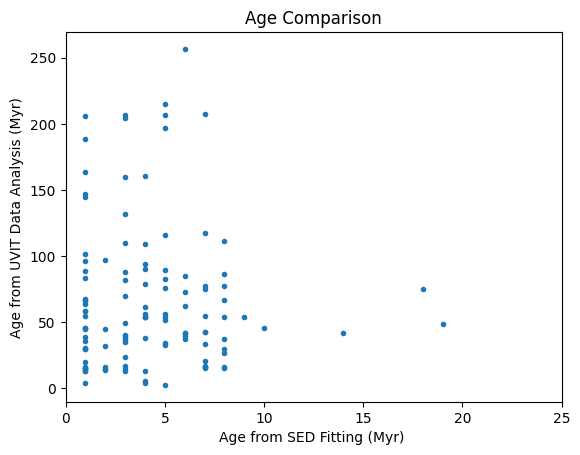

In [10]:
plt.plot(age_paper, age_cross, 'o', markersize = 3)
plt.xlim(0, 25)
plt.xlabel('Age from SED Fitting (Myr) ')
plt.ylabel('Age from UVIT Data Analysis (Myr)')
plt.title('Age Comparison')
plt.show()